In [4]:
#IMPORTING LIBRARIES
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn
%matplotlib inline
import pandas as pd


In [5]:
#READING CSV FILE
data = pd.read_csv(r'C:\Users\Dell\Downloads\Fraud.csv')
df = pd.DataFrame(data) 


In [ ]:
#CLEANING OF DATA
import pandas as pd
# Handling Missing Values
df.dropna(inplace=True)  

# Removing Duplicates
df.drop_duplicates(inplace=True)

# Resetting Index
df.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df)

In [3]:
#Summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  int64  
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 88.0+ MB


In [39]:
#DISPLAY OF THE CSV FILE
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,2,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


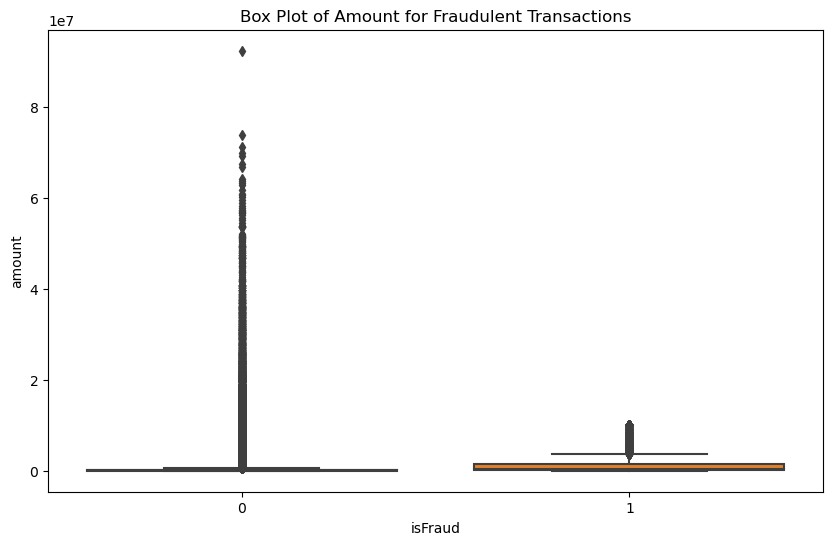

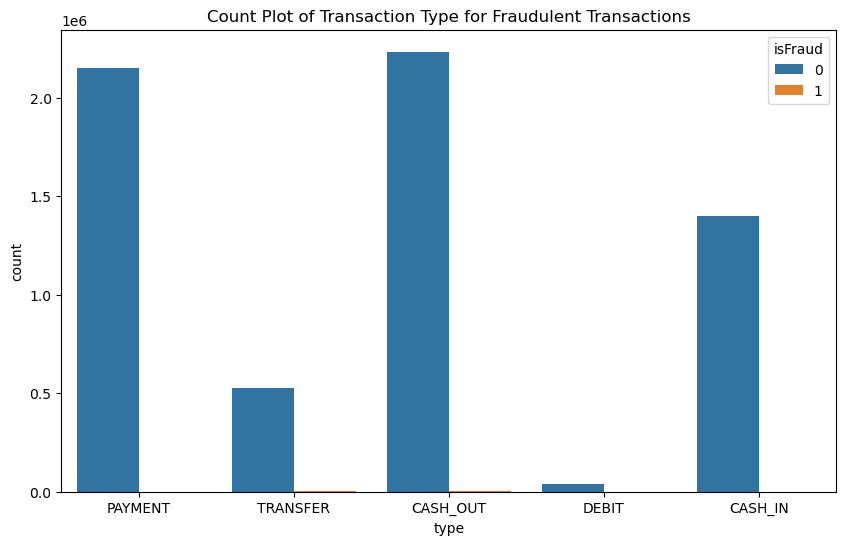

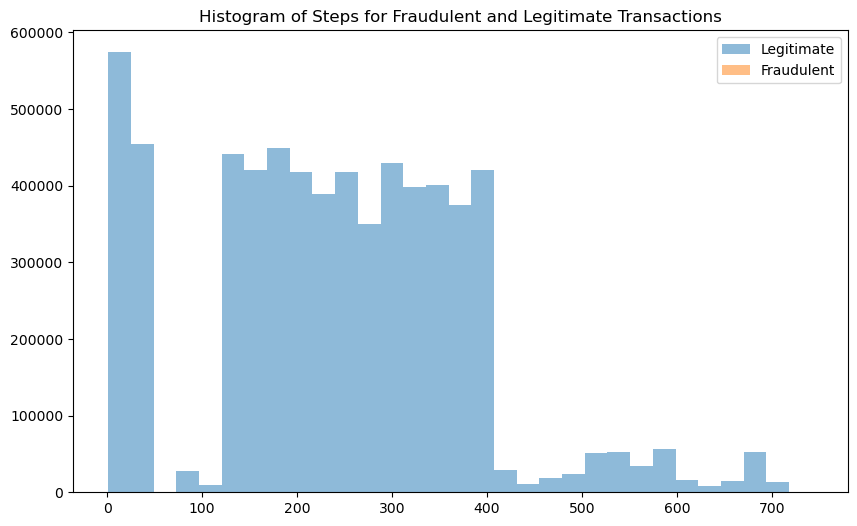

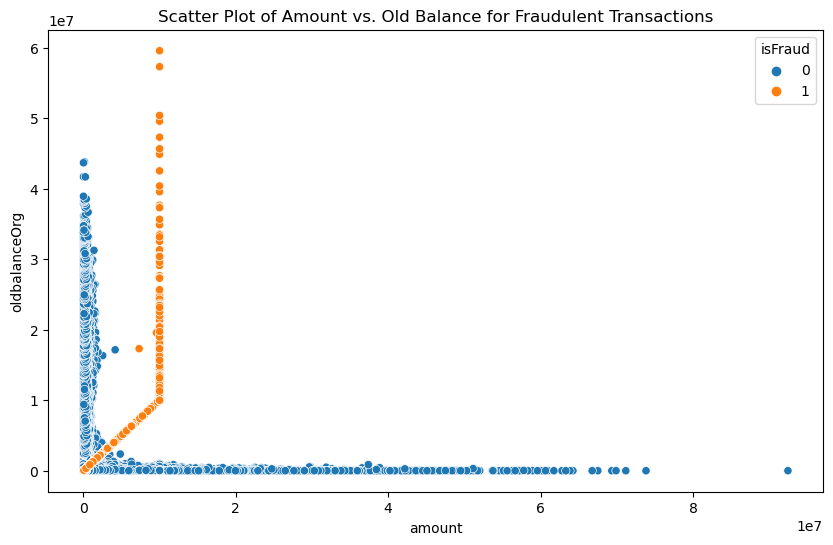

In [17]:
#GRAPHS FOR A BETTER UNDERSTANDING AMONG DIFFERENT PARAMETERS IN THE DATA SET 
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Box Plot of Amount for Fraudulent Transactions')
plt.show()

# Bar plot for transaction type
plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='isFraud', data=df)
plt.title('Count Plot of Transaction Type for Fraudulent Transactions')
plt.show()

# Histogram for steps
plt.figure(figsize=(10, 6))
plt.hist(df[df['isFraud'] == 0]['step'], bins=30, alpha=0.5, label='Legitimate')
plt.hist(df[df['isFraud'] == 1]['step'], bins=30, alpha=0.5, label='Fraudulent')
plt.title('Histogram of Steps for Fraudulent and Legitimate Transactions')
plt.legend()
plt.show()

# Scatter plot for amount vs. oldbalanceOrg
plt.figure(figsize=(10, 6))
sns.scatterplot(x='amount', y='oldbalanceOrg', hue='isFraud', data=df)
plt.title('Scatter Plot of Amount vs. Old Balance for Fraudulent Transactions')
plt.show()


In [40]:
# NUMBER OF FRAUDS IN DATASET
number_fraud = len(data[data.isFraud == 1])
number_no_fraud = len(data[data.isFraud == 0])
print('There are only {}  frauds in the original dataset, even though there are {} no frauds in the dataset.'.format(str(number_fraud),str(number_no_fraud)))

There are only 1142  frauds in the original dataset, even though there are 1047433 no frauds in the dataset.


In [41]:
#ACCURACY OF THE CLASSIFIER
print("The accuracy of the classifier then would be : {} which is the number of good classification over the number of tuple to classify".format(str((6354407-8213)/6354407)))

The accuracy of the classifier then would be : 0.998707511180823 which is the number of good classification over the number of tuple to classify


In [42]:
#CORRELATION OF FEATURES
numeric_df = df.select_dtypes(include=['int64', 'float64'])
df_corr = numeric_df.corr()
 


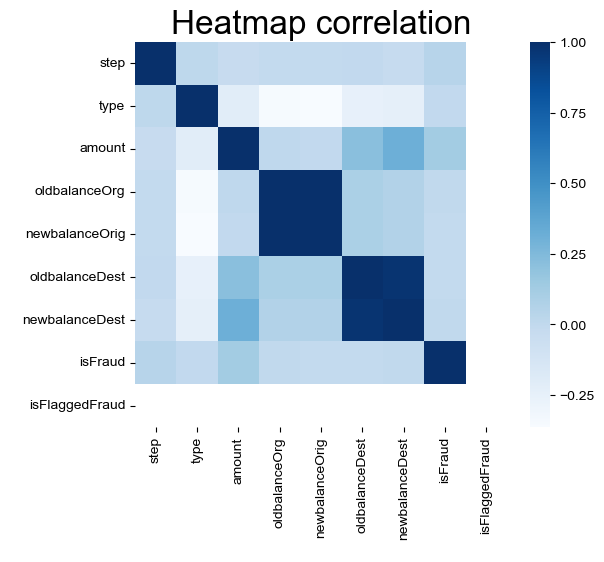

In [43]:
value_str = 'payment'
plt.figure(figsize=(6,5))
seaborn.heatmap(df_corr, cmap='Blues') 
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

In [8]:
#SAMPLING OF DATA
df_train_all = df[0:1000] # dividing the dataset into two parts
df_train_1 = df_train_all[df_train_all['isFraud'] == 1] # Fraud
df_train_0 = df_train_all[df_train_all['isFraud'] == 0] # Non Fraud
print('In this dataset, we have {} frauds so we need to take a similar number of non-fraud'.format(len(df_train_1)))

df_sample=df_train_0.sample(30) # No Fraud
df_train = pd.concat([df_train_1, df_sample], ignore_index=True) # We gather the frauds with the no frauds. 
df_train = df_train.sample(frac=1) # Then we mix our dataset

In this dataset, we have 9 frauds so we need to take a similar number of non-fraud


In [9]:
X_train = df_train[['step', 'type', 'amount','oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
y_train = df_train['isFraud']# Now you can use X_train and y_train to train your machine learning model.

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [10]:
df_test_all = df[1000:2000]
# Change this line to use the correct test set
X_test_all = df_test_all[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]

y_test_all = df_test_all['isFraud']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

In [11]:
#FUNCTION OF CONFUSION MATRIX
class_names=np.array(['0','1']) # Binary label

In [12]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [13]:
#USING SUPPORT VECTOR MACHINE TO IDENTIFY ABOUT FRAUDULENT TRANSACTION
#AN SUPERVISED MACHINE LEARNING ALGORITHM
#TRAINING THE MODEL
classifier = svm.SVC(kernel='linear') 


In [14]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [15]:
prediction_SVM = classifier.predict(X_test_all)


In [16]:
print(len(y_test_all), len(prediction_SVM))


1000 1000


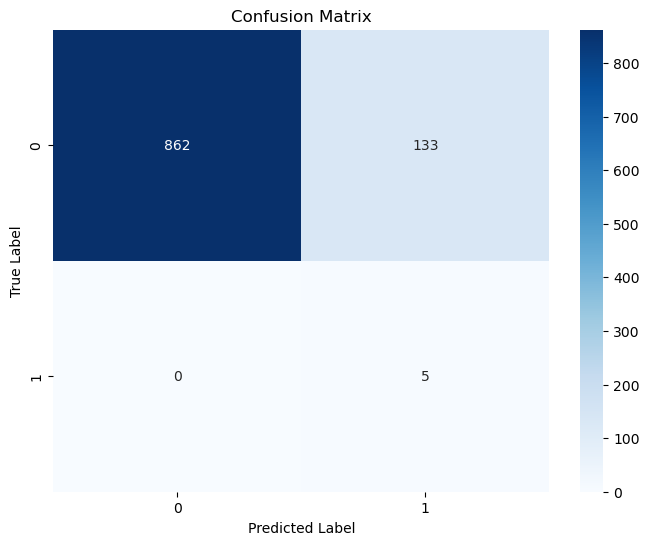

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93       995
           1       0.04      1.00      0.07         5

    accuracy                           0.87      1000
   macro avg       0.52      0.93      0.50      1000
weighted avg       1.00      0.87      0.92      1000



In [17]:
# TESTING OF THE MODEL 
import itertools  
import seaborn as sns
from sklearn.metrics import classification_report

# Confusion Matrix and Plotting
cm = confusion_matrix(y_test_all, prediction_SVM)
#plot_confusion_matrix(cm, class_names)
# Plotting a labeled confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Display Classification Report
print("Classification Report:")
print(classification_report(y_test_all, prediction_SVM))

In [18]:
#RE TESTING OF MODEL
from sklearn.metrics import confusion_matrix

# Assuming 'y_true' is true labels and 'y_pred' is  predicted labels
cm = confusion_matrix(y_test_all, prediction_SVM)

# Print the confusion matrix
print('Confusion Matrix:')
print(cm)

# Handling 1x1 confusion matrix
if cm.shape == (1, 1):
    true_positives = cm[0, 0]
    total_positives = cm.sum()
    accuracy = true_positives / total_positives
else:
    true_positives = cm[1, 1]
    total_positives = cm[1, 1] + cm[1, 0]
    accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()

print('We have detected {} frauds / {} total frauds.'.format(str(true_positives), str(total_positives)))
print('\nSo, the probability to detect a fraud is {}'.format(str(true_positives / total_positives)))

Confusion Matrix:
[[862 133]
 [  0   5]]
We have detected 5 frauds / 5 total frauds.

So, the probability to detect a fraud is 1.0


In [19]:
classifier_b = svm.SVC(kernel='linear',class_weight={0:0.60, 1:0.40})
classifier_b.fit(X_train, y_train)

SVC(class_weight={0: 0.6, 1: 0.4}, kernel='linear')

In [20]:
prediction_SVM_b_all = classifier_b.predict(X_test_all) #We predict all the data set.


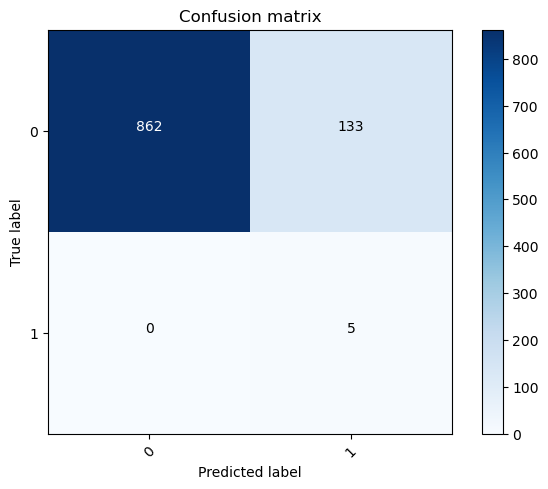

In [21]:
cm = confusion_matrix(y_test_all, prediction_SVM_b_all)
plot_confusion_matrix(cm,class_names)

In [22]:

print('We have detected {} frauds / {} total frauds.'.format(cm[0, 0], cm.sum()))
print('Probability to detect a fraud is {}'.format(cm[0, 0] / cm.sum()))
print("The accuracy is: {} ".format(cm[0, 0] / cm.sum()))


We have detected 862 frauds / 1000 total frauds.
Probability to detect a fraud is 0.862
The accuracy is: 0.862 


In [ ]:
'''
Answers to questions:


1. Data Cleaning is done.

2. A fraud detection model is being developed using the Support Vector Machine algorithm, a supervised machine learning 
technique. This algorithm assists in transforming data into a higher-dimensional space to yield more effective results.

3. In this context, certain parameters carry significant importance, with variables such as 'type,' 'amount,' and the
distinction between fraudulent and legitimate transactions standing out as crucial factors for model selection.

4. Evaluate the model's performance by employing key metrics such as precision, recall, F1-score, and the confusion matrix.
Additionally, explore the impact of different kernel functions, including polynomial and linear kernels, to comprehensively
assess the model's effectiveness.

5. The predictive factors for fraudulent transactions from the dataset, including features such as 'amount', 'oldbalanceOrg',
'newbalanceOrig', 'oldbalanceDest', and 'newbalanceDest'.

6. Yes, these factors make sense for fraud detection. 'Type' and transaction amounts provide transaction context, 
while 'nameOrig' and 'nameDest' link to customer information. 'Oldbalance' and 'newbalance' features capture changes in 
account balances. 'IsFlaggedFraud' identifies potentially fraudulent transactions. Overall, these features collectively 
contribute to identifying suspicious activities.

7. Implement real-time monitoring for transactions exceeding certain thresholds as flagged by isFlaggedFraud. Enhance security
measures for customer authentication.

8. Continuously monitor the model's performance after implementation. Regularly update the model with new data and reevaluate 
its effectiveness.
'''